<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/Talleres/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 1
Procesamiento de Imágenes y Video
Reciben como imagen para procesar el archivo adjunto a este enunciado, ahora bien deben realizar los siguientes análisis y desarrollar los métodos que los solucionan:
1. Extraer una pelota de color a la vez hasta completar 4 de las seis pelotas de colores. Explique los métodos de procesamiento de color utilizados y si fuera el caso explique si no se extrae la totalidad de la pelota, por qué puede pasar este fenómeno.
Deben entregar los códigos desarrollados para este taller documentados y un informe que justifique las decisiones en el diseño de la solución.
Buena suerte !!!

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from google.colab.patches import cv2_imshow

Downloading...
From: https://drive.google.com/uc?id=110a3kGmypCHt46RDgC9t26sgaOsb3CJW
To: /content/PELOTASLISAS-COLORES.jpg
100%|██████████| 21.5k/21.5k [00:00<00:00, 39.9MB/s]


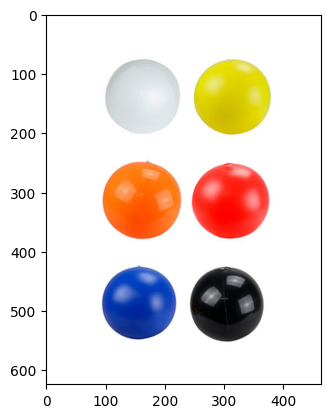

In [8]:
import gdown
import cv2
from matplotlib import pyplot as plt

# Download the image from Google Drive
url = 'https://drive.google.com/uc?id=110a3kGmypCHt46RDgC9t26sgaOsb3CJW'
output = 'PELOTASLISAS-COLORES.jpg'
gdown.download(url, output, quiet=False)

# Read and display the image
image_original = cv2.imread('PELOTASLISAS-COLORES.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Se detectó pelota de color red
Se detectó pelota de color blue
Se detectó pelota de color yellow
Se detectó pelota de color white
Se detectó pelota de color orange
Se detectó pelota de color black


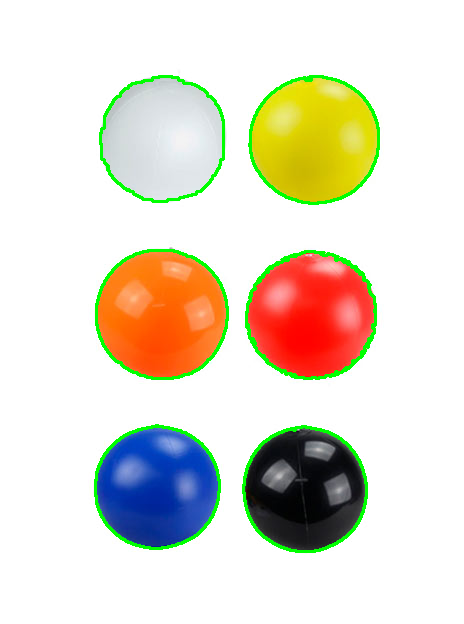

In [9]:
def detect_ball_color(image, lower, upper):
    mask = cv2.inRange(image, lower, upper)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        c = max(contours, key=cv2.contourArea)
        return c
    return None

def main():
    # Leer la imagen
    img = image_original

    # Convertir a HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Definir rangos de colores
    colors = {
        'red': ([0, 21, 0], [4, 255, 255]),
        'blue': ([100, 50, 50], [140, 255, 255]),
        'yellow': ([20, 50, 50], [40, 255, 255]),
        'white': ([77, 6, 0], [180, 75, 255]),
        'orange': ([5, 100, 20], [25, 255, 255]),
        'black': ([0, 0, 0], [180, 255, 150])
    }

    for color, (lower, upper) in colors.items():
        contour = detect_ball_color(hsv, np.array(lower), np.array(upper))
        if contour is not None:
            cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
            print(f"Se detectó pelota de color {color}")

    cv2_imshow(img)

if __name__ == '__main__':
    main()


Se detectó pelota de color red


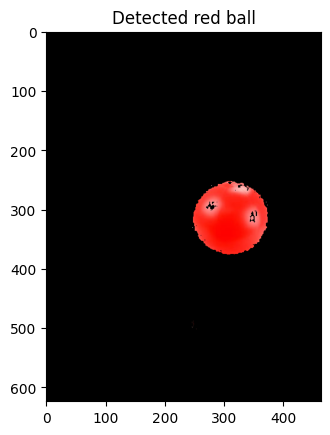

Se detectó pelota de color blue


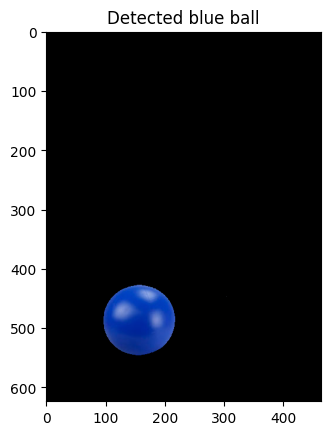

Se detectó pelota de color yellow


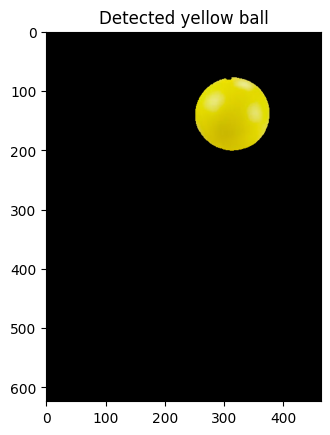

Se detectó pelota de color white


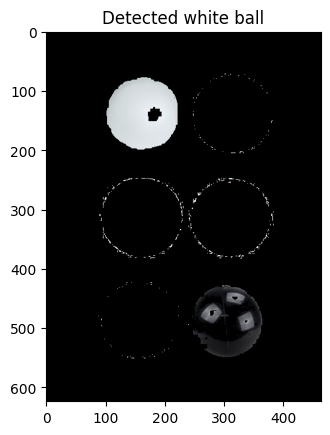

Se detectó pelota de color orange


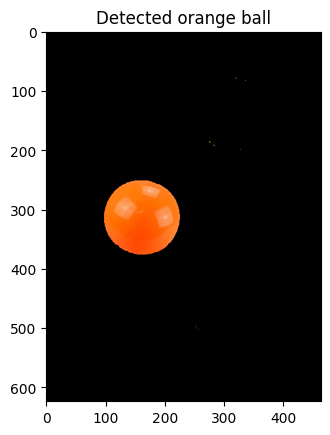

Se detectó pelota de color black


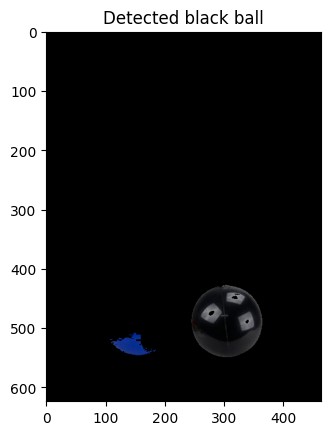

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_ball_color(image, lower, upper):
    mask = cv2.inRange(image, lower, upper)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        c = max(contours, key=cv2.contourArea)
        return mask, c
    return mask, None

def main():
    # Ensure that image_original is available
    img = image_original.copy()

    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Defining color ranges
    colors = {
        'red': ([0, 21, 0], [4, 255, 255]),
        'blue': ([100, 50, 50], [140, 255, 255]),
        'yellow': ([20, 50, 50], [40, 255, 255]),
        'white': ([77, 6, 0], [180, 75, 255]),
        'orange': ([5, 100, 20], [25, 255, 255]),
        'black': ([0, 0, 0], [180, 255, 150])
    }

    for color, (lower, upper) in colors.items():
        mask, contour = detect_ball_color(hsv, np.array(lower), np.array(upper))

        if contour is not None:
            # Use the mask to extract only the detected ball
            detected_ball = cv2.bitwise_and(img, img, mask=mask)

            # Print the detected color
            print(f"Se detectó pelota de color {color}")

            # Show the image with only the detected ball
            plt.figure()  # Create a new figure for each color
            plt.imshow(cv2.cvtColor(detected_ball, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
            plt.title(f"Detected {color} ball")  # Set title for the figure
            plt.show()

# Execute the main function
main()